In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
file_path = '../data/raw/marketing_campaign.csv'  # Update as needed
df = pd.read_csv(file_path, sep='\t') 

In [64]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [65]:
print("The shape of the dataframe is:", df.shape)

The shape of the dataframe is: (2240, 29)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Data Cleaning

After observation of the df,
the missing values of Income should be imputed

Impute Income using median by education group

In [67]:
df['Income'] = df.groupby('Education')['Income'].transform(lambda x:x.fillna(x.median()))

In [68]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52242.594866,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25039.061738,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51498.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Exploration of the data

In the Customer Personality Analysis dataset:
    Response should be used as the Target Variable (Y)
    Response = 1 → the customer responded to the last marketing campaign.

    Response = 0 → they did not respond.

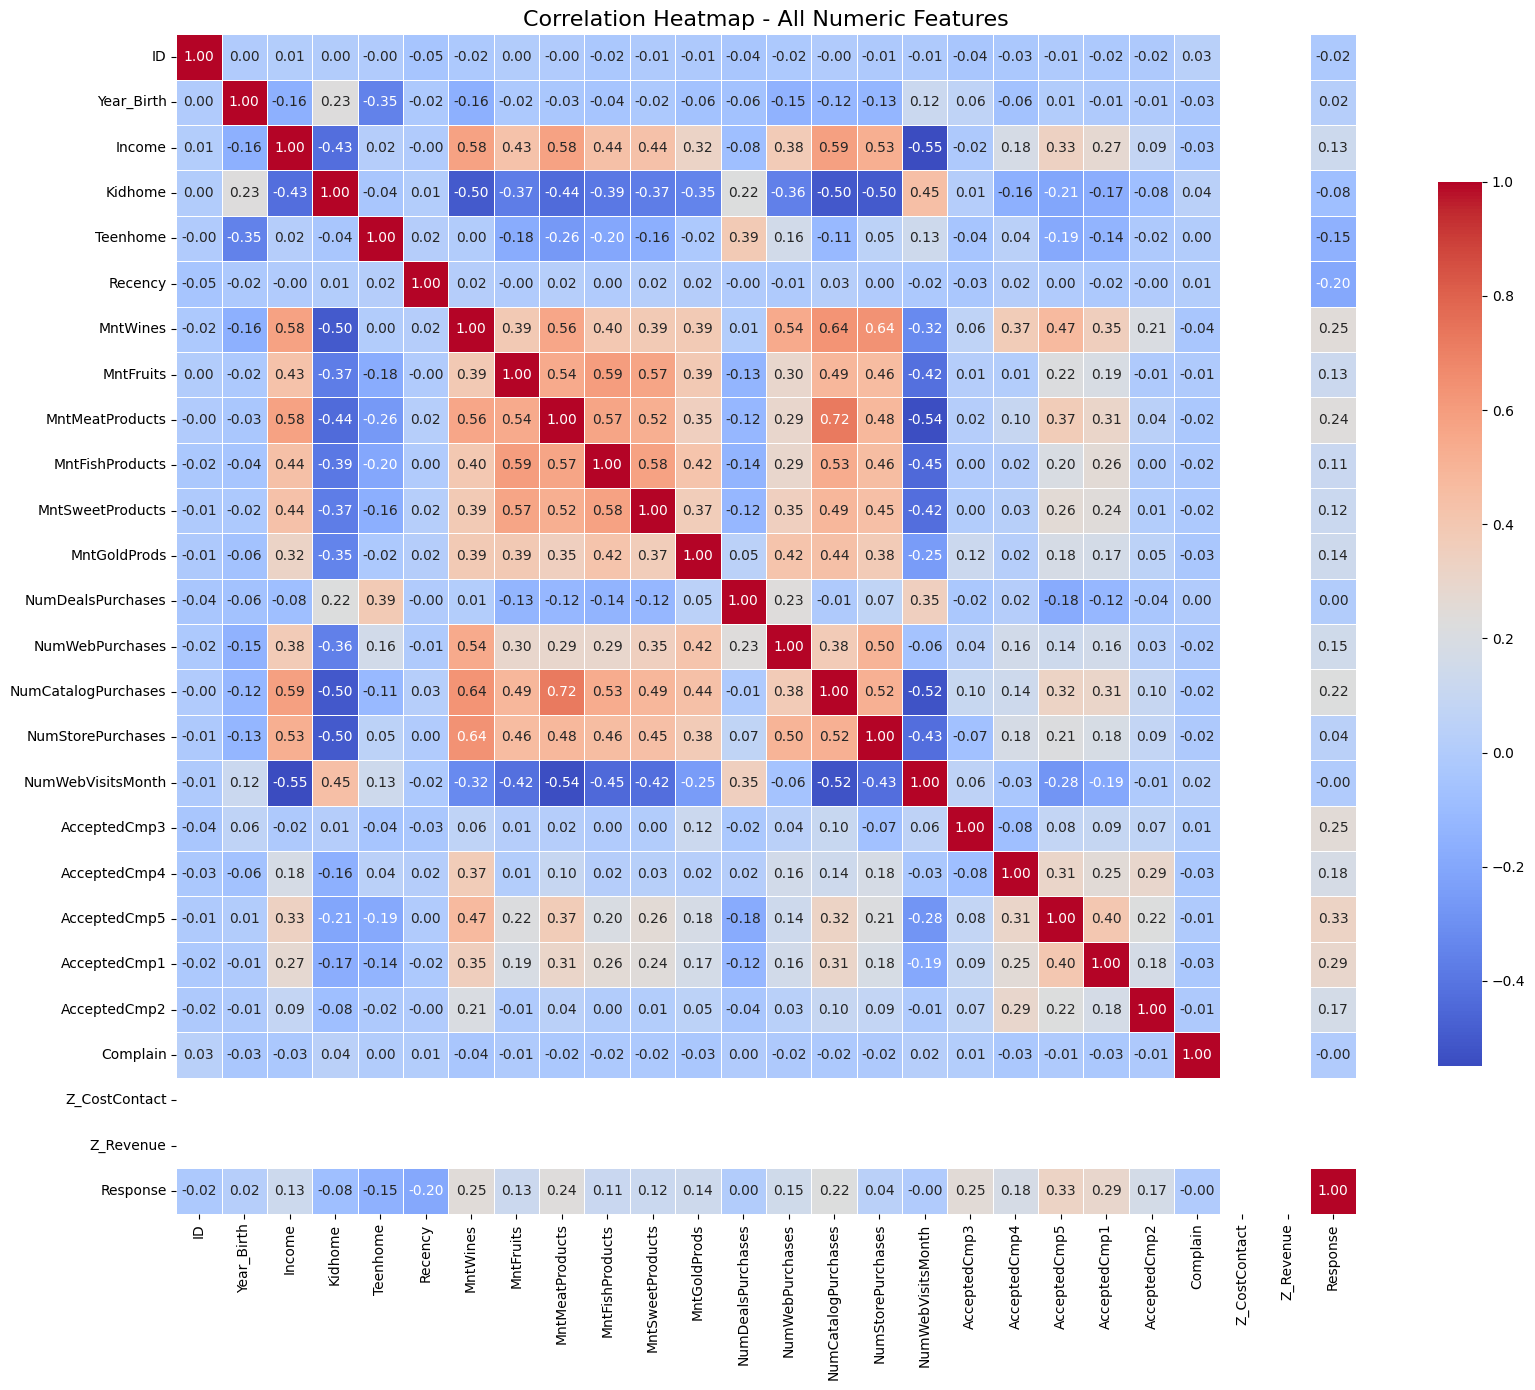

In [69]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrx
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(18, 14))

# Draw the heatmap
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)
plt.title('Correlation Heatmap - All Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

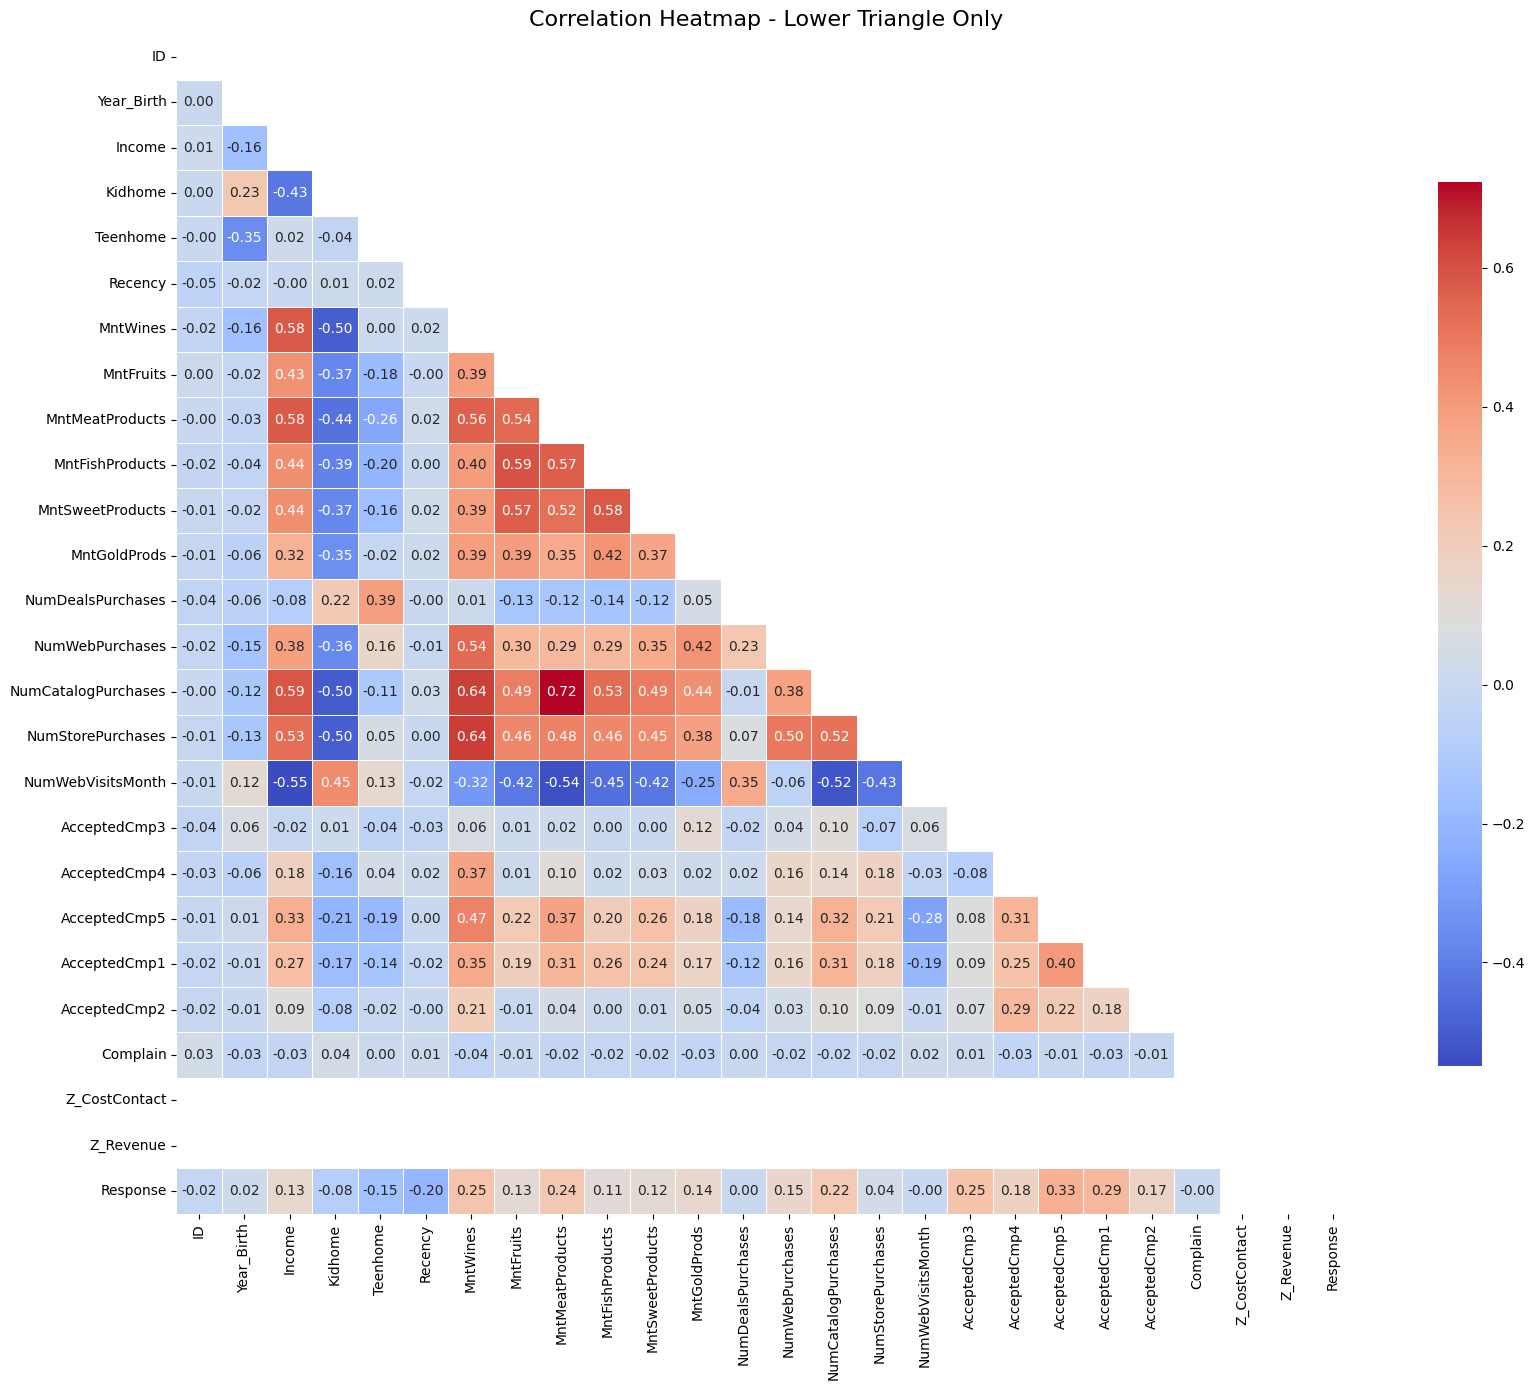

In [70]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the figure
plt.figure(figsize=(18, 14))

# Draw heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)

plt.title('Correlation Heatmap - Lower Triangle Only', fontsize=16)
plt.tight_layout()
plt.show()

In [71]:
# Compute correlation matrix
corr_matrix_pair = numeric_columns.corr().abs()

# Mask self-correlations
mask = np.triu(np.ones(corr_matrix_pair.shape), k=1)

In [72]:
# Use the mask to get upper triangle values
high_corr_pairs = [
    (corr_matrix_pair.columns[i], corr_matrix_pair.columns[j], corr_matrix_pair.iloc[i, j])
    for i in range(len(corr_matrix_pair.columns))
    for j in range(i+1, len(corr_matrix_pair.columns))
    if corr_matrix_pair.iloc[i, j] > 0.5
]

# Sort by correlation strength
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)

In [73]:
# Display
for col1, col2, corr in high_corr_pairs:
    print(f"{col1} ↔ {col2}: {corr:.2f}")

MntMeatProducts ↔ NumCatalogPurchases: 0.72
MntWines ↔ NumStorePurchases: 0.64
MntWines ↔ NumCatalogPurchases: 0.64
MntFruits ↔ MntFishProducts: 0.59
Income ↔ NumCatalogPurchases: 0.59
MntFishProducts ↔ MntSweetProducts: 0.58
Income ↔ MntMeatProducts: 0.58
Income ↔ MntWines: 0.58
MntMeatProducts ↔ MntFishProducts: 0.57
MntFruits ↔ MntSweetProducts: 0.57
MntWines ↔ MntMeatProducts: 0.56
Income ↔ NumWebVisitsMonth: 0.55
MntFruits ↔ MntMeatProducts: 0.54
MntWines ↔ NumWebPurchases: 0.54
MntMeatProducts ↔ NumWebVisitsMonth: 0.54
MntFishProducts ↔ NumCatalogPurchases: 0.53
Income ↔ NumStorePurchases: 0.53
MntMeatProducts ↔ MntSweetProducts: 0.52
NumCatalogPurchases ↔ NumWebVisitsMonth: 0.52
NumCatalogPurchases ↔ NumStorePurchases: 0.52
NumWebPurchases ↔ NumStorePurchases: 0.50
Kidhome ↔ NumCatalogPurchases: 0.50


Create Age from birthyear

In [74]:
# Assuming current year is 2025
df['Age'] = 2021 - df['Year_Birth']

In [75]:
df.drop(columns=[
    'ID',             # Identifier
    'Year_Birth',     # Redundant after creating Age
    'Z_CostContact',  # Constant
    'Z_Revenue',      # Constant
    'Complain'        # No correlation with anything
], inplace=True)


In [76]:
# Calculating customer tenure

# Ensure Dt_Customer is datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Reference date
reference_date = pd.to_datetime('2021-01-01')

# Customer tenure in years (rounded down)
df['Customer_Tenure_Years'] = ((reference_date - df['Dt_Customer']).dt.days) // 365

In [77]:
df.drop(columns=['Dt_Customer'], inplace=True)

In [78]:
# Define campaign columns
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Create total accepted campaign count
df['Total_Accepted_Campaigns'] = df[campaign_cols].sum(axis=1)

# Drop individual campaign columns
df.drop(columns=campaign_cols, inplace=True)

In [79]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,Customer_Tenure_Years,Total_Accepted_Campaigns
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,88,3,8,10,4,7,1,64,8,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,6,2,1,1,2,5,0,67,6,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,42,1,8,2,10,4,0,56,7,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,5,2,2,0,4,6,0,37,6,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,15,5,5,3,6,5,0,40,6,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Education                 2240 non-null   object 
 1   Marital_Status            2240 non-null   object 
 2   Income                    2240 non-null   float64
 3   Kidhome                   2240 non-null   int64  
 4   Teenhome                  2240 non-null   int64  
 5   Recency                   2240 non-null   int64  
 6   MntWines                  2240 non-null   int64  
 7   MntFruits                 2240 non-null   int64  
 8   MntMeatProducts           2240 non-null   int64  
 9   MntFishProducts           2240 non-null   int64  
 10  MntSweetProducts          2240 non-null   int64  
 11  MntGoldProds              2240 non-null   int64  
 12  NumDealsPurchases         2240 non-null   int64  
 13  NumWebPurchases           2240 non-null   int64  
 14  NumCatal

In [81]:
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True).astype(int)

In [82]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138,0,0,58,635,88,546,172,88,88,...,1,0,0,0,0,0,1,0,0,0
1,46344,1,1,38,11,1,6,2,1,6,...,1,0,0,0,0,0,1,0,0,0
2,71613,0,0,26,426,49,127,111,21,42,...,1,0,0,0,0,0,0,1,0,0
3,26646,1,0,26,11,4,20,10,3,5,...,1,0,0,0,0,0,0,1,0,0
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,1,0,0,1,0,0,0,0


In [83]:
df.to_csv('../data/processed/marketing_final_encoded.csv', index=False)